<a href="https://colab.research.google.com/github/tesyaeriana/Machine_Learning/blob/main/pertemuan_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Tesya Eriana**<br>
**No Absen: 28**<br>
**Kelas: TI-3A**<br>
**PERTEMUAN 9-PERCEPTRON dan ANN**

**PRAKTIKUM 1**



> Langkah 1 - Import Library



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



> Langkah 2 - Load Data dan Visualisasi



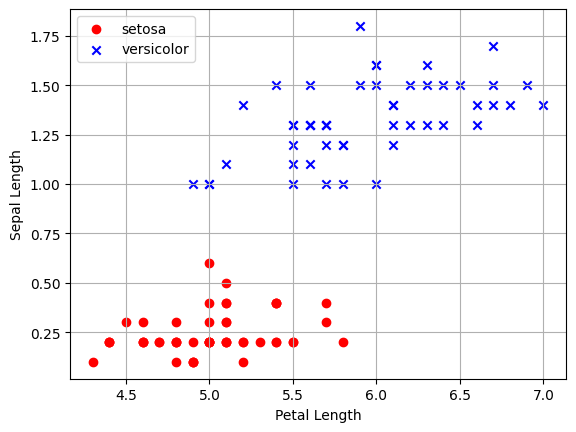

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()



> Langkah 3 - Membuat Kelas Perceptron



In [3]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



> Langkah 4 - Pilih Data dan Encoding Label



In [4]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih



> Langkah 5 - Fitting Model



In [5]:

ppn = Perceptron(eta=0.1, n_iter=10)  # Set a positive learning rate, e.g., 0.1
ppn.fit(X, y)




> Langkah 6 - Visualisasi Nilai Error Per Epoch



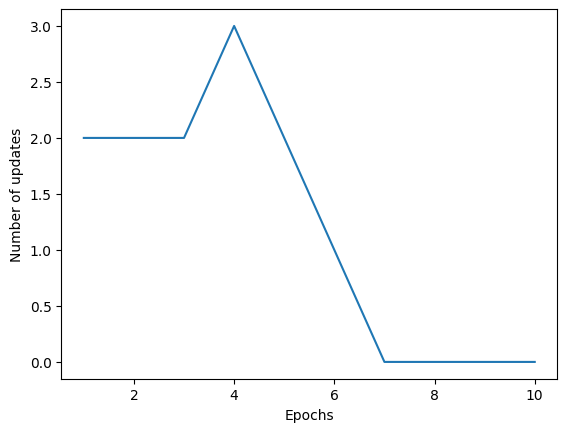

In [6]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()



> Langkah 7 - Visualiasasi Decision Boundary



<ipython-input-14-0a3c6e80ade6>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


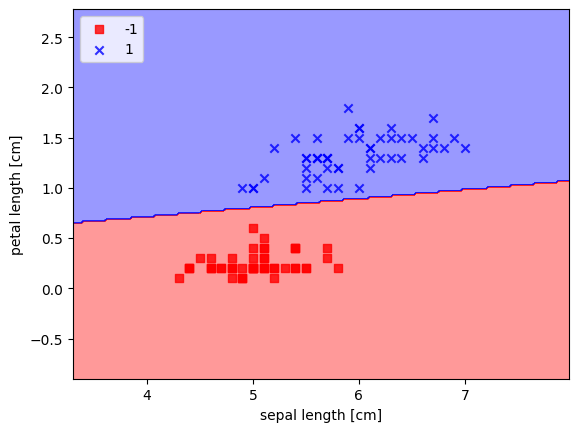

In [14]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

**PRAKTIKUM 2**



> Langkah 1 - Import Library



In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report



> Langkah 2 - Pilih Label dan Split Data



In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))



> Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron



In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**PRAKTIKUM 3**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


**PRAKTIKUM 4**

**Pra Pengolahan Data**


> Langkah 1 - Import Library



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf



> Langkah 2 - Load Data


In [ ]:
#mengupload dataset yang akan digunakan
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
#Cek data X
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]




> Langkah 3 - Encoding Data Kategorikal



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
#Cek data(X)
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]




> Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]




> Langkah 5 - Split Data


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



> Langkah 6 - Scaling Fitur



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Membuat Model ANN**

In [ ]:
#Inisiasi Model ANN
ann = tf.keras.models.Sequential()
#Membuat Input layer dan hidden layer pertama
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#Membuat hidden layer kedua
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#Membuat output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


**Training Model**





In [ ]:
#Compile model (Menyatukan Arsitektur) ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting Model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6435 - accuracy: 0.6766
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5093 - accuracy: 0.7986
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8089
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8220
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8346
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8414
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8456
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8484
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8485
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3636 - accura

**Membuat Prediksi**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000, 0]])) > 0.5)

1/1 [==============================] - 0s 448ms/step
[[False]]


Output yang dihasilkan yaitu false

In [ ]:
#Prediksi dengan data testing
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#cek akurasi dan confusion matrik
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1508   87]
 [ 193  212]]


0.86

**TUGAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from subprocess import check_output
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
#import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


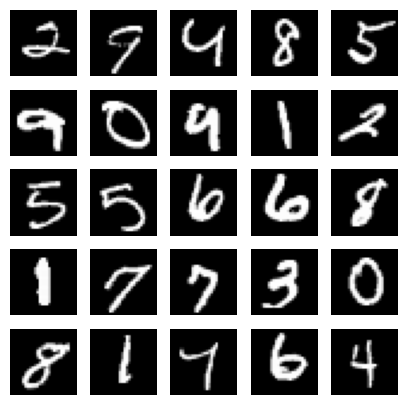

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

**DESIGN MODEL MENGGUNAKAN KERAS**

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               200960    
                                                                 
 activation_27 (Activation)  (None, 256)               0         
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 256)               65792     
                                                                 
 activation_28 (Activation)  (None, 256)               0         
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_47 (Dense)            (None, 10)              

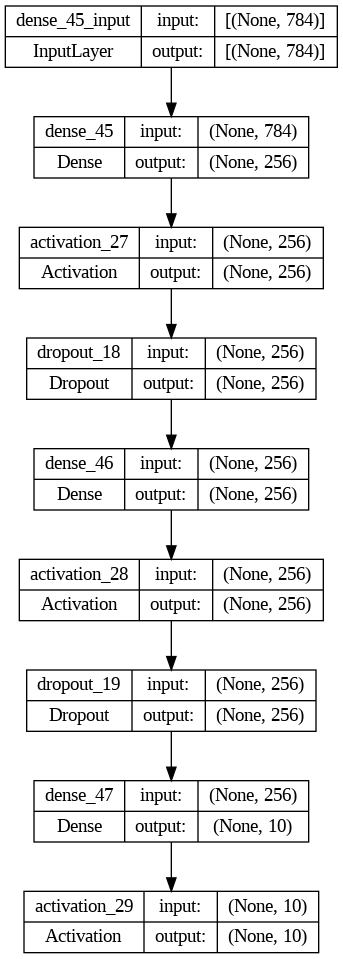

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

**IMPLEMENTASI MLP MODEL USING KERAS**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.4324 - accuracy: 0.8672
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1969 - accuracy: 0.9407
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1545 - accuracy: 0.9537
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1299 - accuracy: 0.9608
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1116 - accuracy: 0.9655
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1070 - accuracy: 0.9675
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0933 - accuracy: 0.9707
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0876 - accuracy: 0.9730
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0812 - accuracy: 0.9743
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0765 - accuracy: 

**EVALUASI PERFORMA**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prediksi hasil dari data pengujian
y_pred = model.predict(x_test)

# Mengonversi prediksi ke bilangan bulat
y_pred = np.argmax(y_pred, axis=1)

# Mengonversi label kelas ke bilangan bulat
y_test = np.argmax(y_test, axis=1)

# Membuat matriks kebingungan
labels = np.unique(y_test)
confusion = confusion_matrix(y_test, y_pred, labels=labels)

print("Confusion Matrix:")
print(confusion)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 972    1    0    2    1    0    2    0    1    1]
 [   0 1126    2    2    0    1    2    0    2    0]
 [   2    0 1014    2    2    0    3    5    4    0]
 [   0    0    3  995    0    3    0    4    3    2]
 [   1    1    1    0  966    0    5    3    1    4]
 [   2    0    0    9    1  872    5    0    2    1]
 [   3    2    0    1    5    3  942    0    2    0]
 [   1    3    7    0    0    0    0 1014    2    1]
 [   2    0    3    3    3    1    1    3  956    2]
 [   1    3    0    5   12    2    1    6    5  974]]
Accuracy: 0.9831


**IMPLEMENTASI ANN MENGGUNAKAN TENSORFLOW**

**Import Library**

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')
#cuda 12.1 not recognized by tf :(
%matplotlib inline
# print(tensorflow.__version__)


**Menyiapkan Data MNIST dan Melakukan Splitting**

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

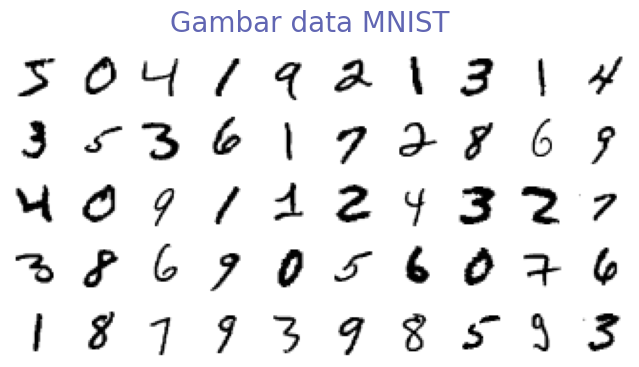

In [33]:

# Menampilkan gambar dari data MNIST

fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

**Menampilkan informasi dataset MNIST**

In [34]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


**Reshape dan Normalisasi Data**

In [35]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


**Membuat Pemodelan ANN**

In [36]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [38]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [23]:

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Melakukan Pelatihan dan Pengujian Dataset**

In [24]:

history = nn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5171 - accuracy: 0.8426
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3219 - accuracy: 0.9020
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2814 - accuracy: 0.9141
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2604 - accuracy: 0.9195
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2444 - accuracy: 0.9240
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2294 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2212 - accuracy: 0.9308
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2172 - accuracy: 0.9319
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2074 - accuracy: 0.9348
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.204

**Membuat Visualisasi dan Evaluasi**

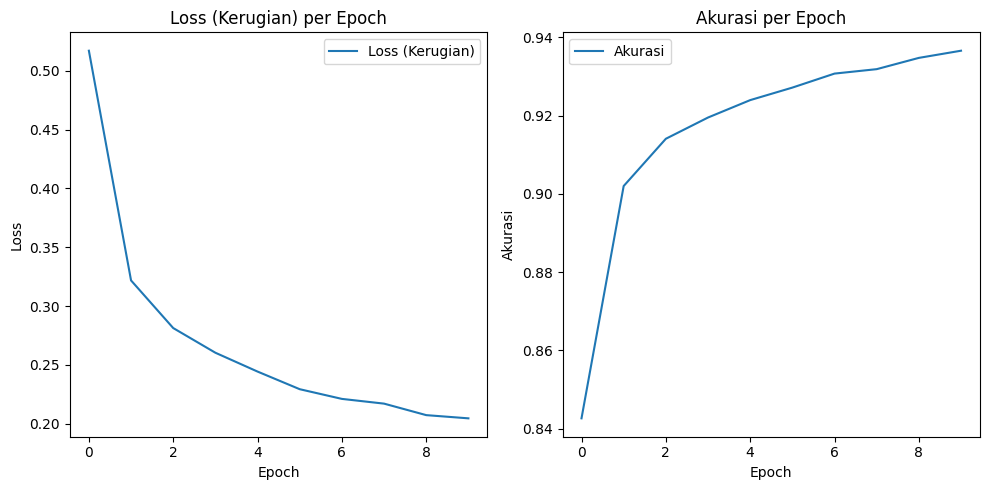

In [25]:
# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Kerugian)')
plt.title('Loss (Kerugian) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

**Membuat Confusion Matriks**

In [26]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 0s 912us/step


0.959

In [27]:

# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 963,    0,    2,    1,    0,    2,    9,    2,    1,    0],
       [   0, 1117,    4,    3,    0,    1,    4,    0,    6,    0],
       [   3,    1,  999,    6,    4,    1,    2,   10,    6,    0],
       [   1,    3,   12,  974,    1,    9,    1,    6,    2,    1],
       [   0,    0,    5,    0,  948,    0,    9,    1,    2,   17],
       [   3,    1,    0,   21,    4,  835,   14,    3,    8,    3],
       [   7,    2,    0,    0,    4,    7,  937,    0,    1,    0],
       [   2,   12,   15,    4,    6,    0,    0,  978,    0,   11],
       [  11,    7,    7,   14,    7,   12,   10,   10,  892,    4],
       [   5,    5,    0,   15,   23,    6,    1,    6,    1,  947]])

<Axes: >

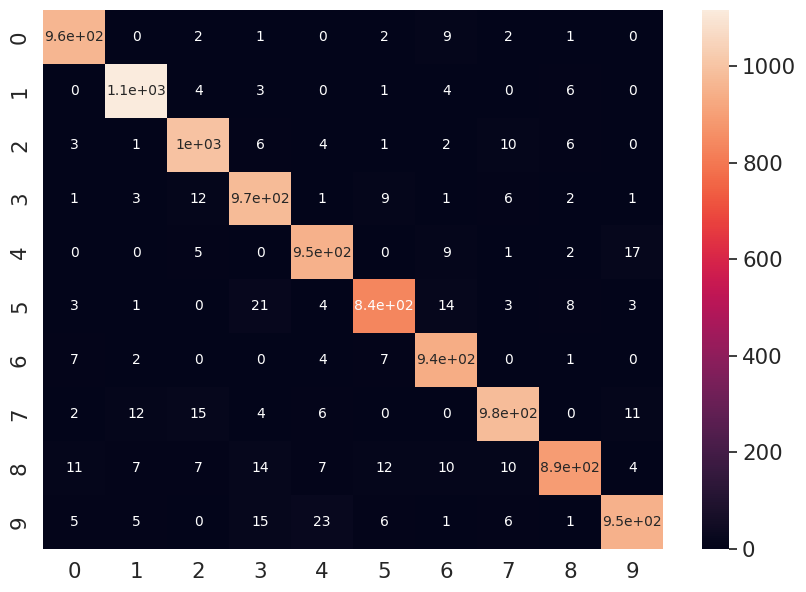

In [28]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size